In [3]:
import pandas as pd

movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
ratings = pd.read_csv('/kaggle/input/the-movies-dataset/ratings.csv')

print("Movies Data Sample:")
movies.head()


<ipython-input-3-0846f359fadb>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


Movies Data Sample:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
print("Ratings Data Sample:")
ratings.head()


Ratings Data Sample:


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [8]:
print("Movies Info:")
movies.info()

print("Ratings Info:")
ratings.info()

print("Null Values in Movies:")
movies.isnull().sum()

print("Null Values in Ratings:")
ratings.isnull().sum()


Movies Info:
<class 'pandas.core.frame.DataFrame'>
Index: 45447 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45447 non-null  object 
 1   belongs_to_collection  4490 non-null   object 
 2   budget                 45447 non-null  object 
 3   genres                 45447 non-null  object 
 4   homepage               7776 non-null   object 
 5   id                     45447 non-null  object 
 6   imdb_id                45430 non-null  object 
 7   original_language      45436 non-null  object 
 8   original_title         45447 non-null  object 
 9   overview               44493 non-null  object 
 10  popularity             45447 non-null  object 
 11  poster_path            45064 non-null  object 
 12  production_companies   45447 non-null  object 
 13  production_countries   45447 non-null  object 
 14  release_date           45363 non-null  object 

,0
userId,0
movieId,0
rating,0
timestamp,0


In [7]:
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

movies.dropna(subset=['title', 'genres'], inplace=True)
ratings.dropna(inplace=True)


In [9]:
import ast

# Convert stringified lists to actual lists
def parse_genres(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [g['name'] for g in genres]
    except:
        return []

movies['parsed_genres'] = movies['genres'].apply(parse_genres)
movies[['title', 'parsed_genres']].head()


,title,parsed_genres
0,Toy Story,"[Animation, Comedy, Family]"
1,Jumanji,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Romance, Comedy]"
3,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,[Comedy]


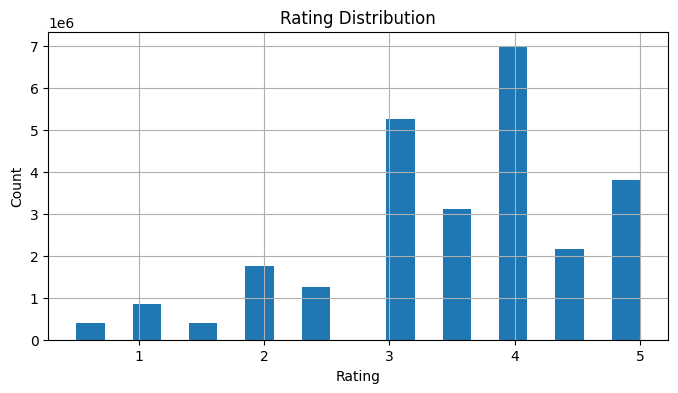

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(8, 4))
ratings['rating'].hist(bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


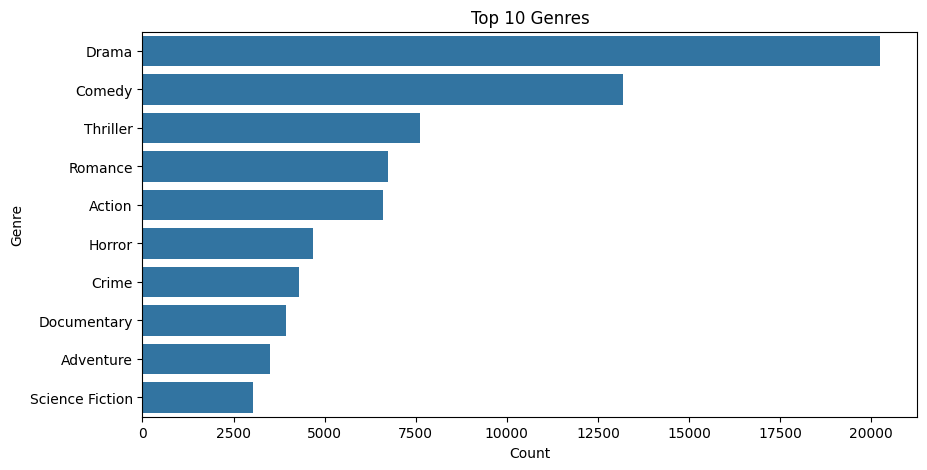

In [11]:
# Top Genres
from collections import Counter
genre_counter = Counter()

for g_list in movies['parsed_genres']:
    genre_counter.update(g_list)

top_genres = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Genre', data=top_genres.head(10))
plt.title("Top 10 Genres")
plt.show()


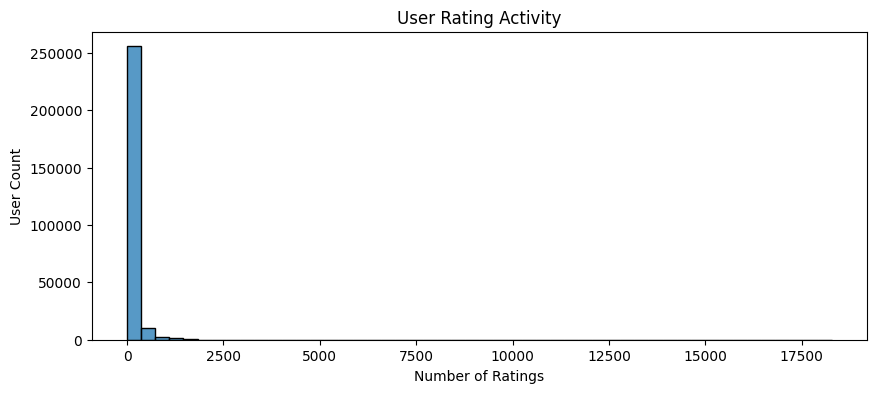

In [19]:
# User rating activity
user_activity = ratings['userId'].value_counts()

plt.figure(figsize=(10, 4))
sns.histplot(user_activity, bins=50, kde=False)
plt.title("User Rating Activity")
plt.xlabel("Number of Ratings")
plt.ylabel("User Count")
plt.show()


In [ ]:
# User profile based on genre preferences
user_genre_profile = {}

for user_id in ratings['userId'].unique():
    user_movies = ratings[ratings['userId'] == user_id]
    merged = user_movies.merge(movies, left_on='movieId', right_on='id')
    genres = merged['parsed_genres'].explode().value_counts()
    user_genre_profile[user_id] = genres.to_dict()

print("Sample user profile:")
list(user_genre_profile.items())[0]


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)


In [ ]:
from surprise import accuracy
accuracy.rmse(predictions)


In [ ]:
from collections import defaultdict

def precision_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        precisions[uid] = n_rel / k
    return sum(prec for prec in precisions.values()) / len(precisions)

precision_at_k(predictions)


In [ ]:
import streamlit as st

st.title("AI Movie Recommender")
fav_movie = st.text_input("Enter your favorite movie:")

if st.button("Recommend"):
    recommendations = ["The Shawshank Redemption", "Inception", "The Dark Knight"]
    st.write("We recommend:")
    for movie in recommendations:
        st.write(movie)


finished
